In [2]:
import calendar
from datetime import datetime

In [55]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

In [24]:
from sklearn.preprocessing import StandardScaler

In [4]:
import gzip, csv
from itertools import islice

with gzip.open('../data/train.csv.gz') as f:
    reader = csv.DictReader(f)
    data = list(islice(reader, 2000))

In [43]:
train = pd.read_csv('../data/train.csv.gz', parse_dates=True)

In [123]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [47]:
# Saco los 
train = train[train.Y < 90]

In [57]:
def get_dates(d):
    dt = datetime.strptime(d, '%Y-%m-%d %H:%M:%S')
    return dt.hour, dt.month, dt.year

In [56]:
df = train[['PdDistrict']]
df['Day'] = train['DayOfWeek']
df['Hour'], df['Month'], df['Year'] = zip(*train['Dates'].apply(get_dates))

NameError: name 'get_dates' is not defined

In [172]:
df['IsIntersection'] = train.Address.map(lambda x: '/' in x)

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [51]:
address_scaler = StandardScaler()
address_scaler.fit(train[['X', 'Y']])
train[['X', 'Y']] = address_scaler.transform(train[['X', 'Y']])

In [170]:
df.head()

,PdDistrict,Day,Hour,Month,Year,IsIntersection
0,NORTHERN,Wednesday,23,5,2015,True
1,NORTHERN,Wednesday,23,5,2015,True
2,NORTHERN,Wednesday,23,5,2015,True
3,NORTHERN,Wednesday,23,5,2015,False
4,PARK,Wednesday,23,5,2015,False


In [161]:
df.IsIntersection.head()

0     True
1     True
2     True
3    False
4    False
Name: Address, dtype: bool

In [116]:
%matplotlib inline

def graph_bars(items, width=16, alt_labels=None):
    labels, counts = np.unique(items, return_counts=True)
    index = np.arange(len(counts))
    plt.figure(figsize=(width,6))
    plt.bar(index, counts, 1, alpha=0.4, color='y', label='Bars')
    plt.xticks(index + 0.5, alt_labels or labels, rotation=70)
    return plt

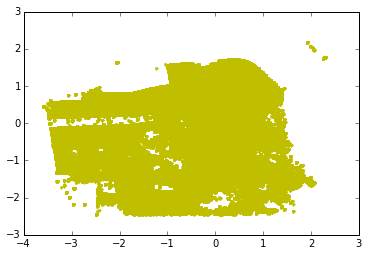

In [54]:
plt.plot(train["X"], train["Y"], '.y')
plt.show()

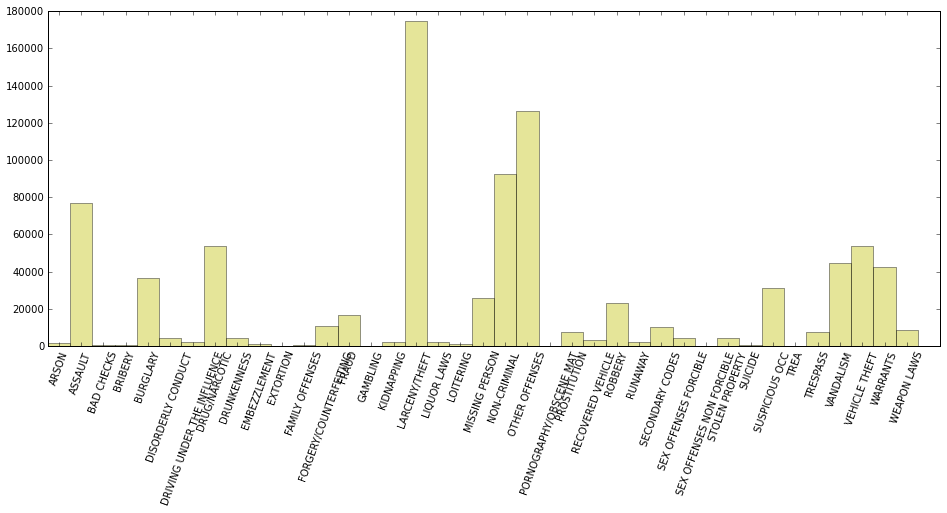

In [155]:
graph_bars(train.Category).show()

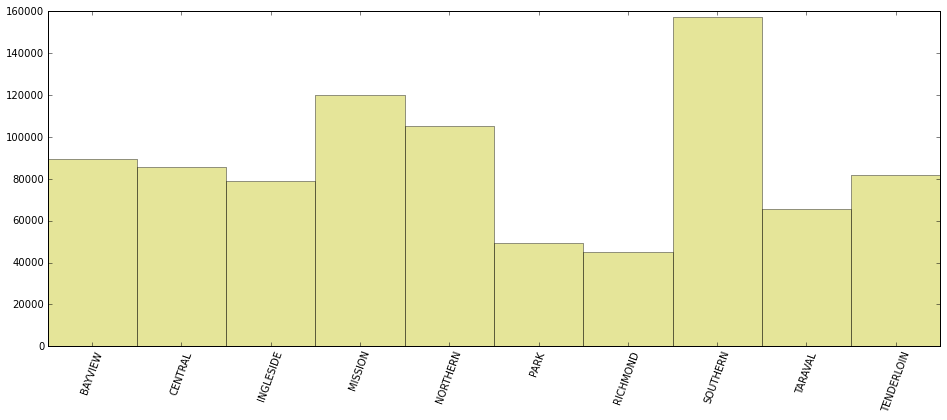

In [153]:
graph_bars(df.PdDistrict).show()

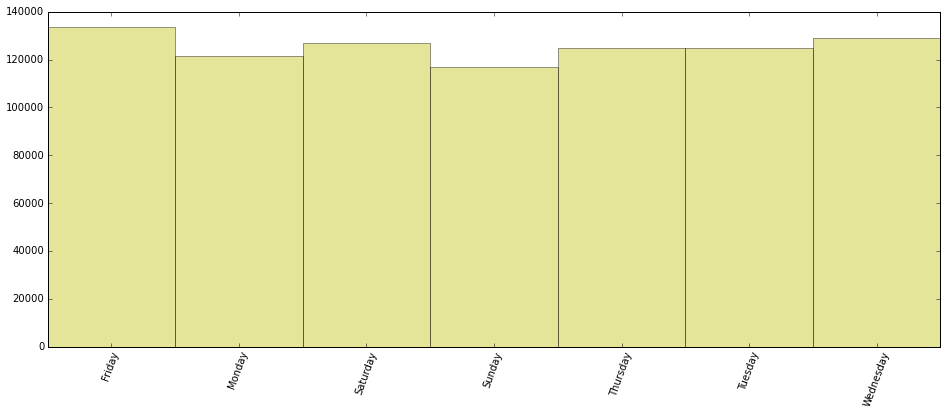

In [151]:
graph_bars(df.Day).show()

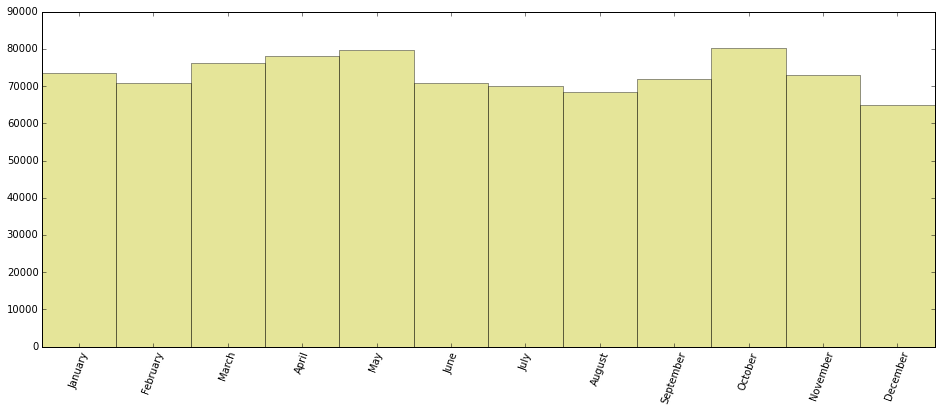

In [121]:
graph_bars(df.Month, alt_labels=calendar.month_name[1:]).show()

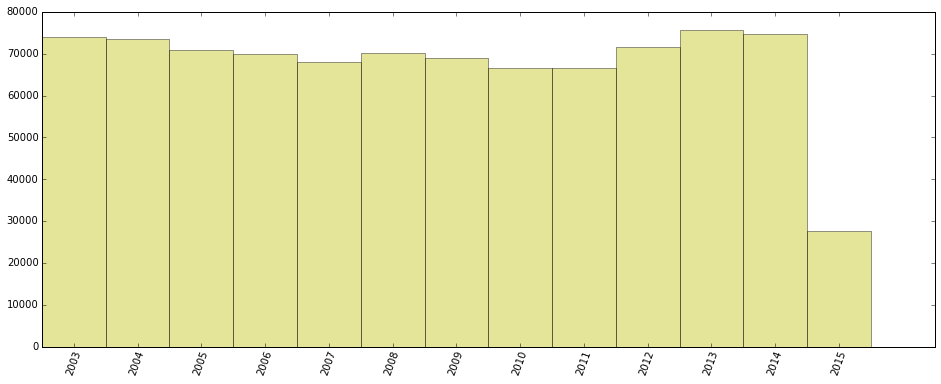

In [122]:
graph_bars(df.Year).show()

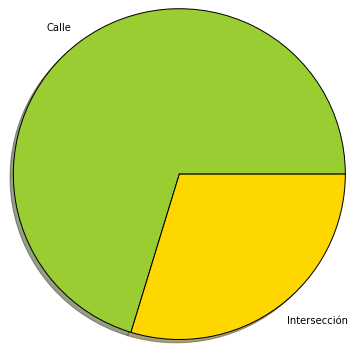

In [171]:
#
labels, count = np.unique(df.IsIntersection, return_counts=True)
labels = [u'Intersección' if x else u'Calle' for x in labels]

plt.figure(figsize=(6,6))
pie, _ = plt.pie(count, colors=['yellowgreen', 'gold'], labels=labels, shadow=True)
plt.axis('equal')
plt.show()